In [82]:
%pip install requests beautifulsoup4 pandas

Note: you may need to restart the kernel to use updated packages.


In [83]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np


from datetime import datetime


from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [84]:
url = "http://www.ipeadata.gov.br/ExibeSerie.aspx?module=m&serid=1650971490&oper=view"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [85]:
table = soup.find('table',{'class': 'dxgvTable'})

In [86]:
# Inicializando listas para cabeçalhos e dados
headers = []
data = []

In [87]:
# Definindo a ordem desejada dos cabeçalhos
desired_headers = ["Data", "Preço - petróleo bruto - Brent (FOB)"]

# Extraindo cabeçalhos da primeira linha (tr) da tabela
header_row = table.find('tr')  # Encontrando a primeira linha da tabela

# Iterando apenas sobre as células que são cabeçalhos
for th in header_row.find_all('td'):
    header_text = th.text.strip()  # Obtendo o texto da célula
    # Adicionando apenas os cabeçalhos desejados e não vazios
    if header_text in desired_headers:
        headers.append(header_text)

# Exibindo os cabeçalhos extraídos na ordem correta
ordered_headers = [header for header in desired_headers if header in headers]

In [88]:
print("Cabeçalhos extraídos:", ordered_headers)

Cabeçalhos extraídos: ['Data', 'Preço - petróleo bruto - Brent (FOB)']


In [89]:
# Extraindo dados das linhas subsequentes
# Ignorando a primeira linha que contém os cabeçalhos
for tr in table.find_all('tr')[1:]:  # Começando a partir da segunda linha
    row_data = []
    # Verificando se a linha contém células de dados
    if len(tr.find_all('td')) > 0:  # Apenas processa se houver células de dados
        for td in tr.find_all('td', class_='dxgv'):  # Filtrando apenas as células com a classe 'dxgv'
            row_data.append(td.text.strip())
        if row_data:  # Adiciona apenas se row_data não estiver vazio
            data.append(row_data)

In [90]:
# Teste para verificar os dados antes de transformar para DataFrame
# print("Dados:", data)

In [91]:
# Transformando em DataFrame
df_ipeadata = pd.DataFrame(data, columns=['Data', 'Preço - petróleo bruto - Brent (FOB)'])

In [92]:
df_ipeadata.head()

,Data,Preço - petróleo bruto - Brent (FOB)
0,14/04/2025,"67,18"
1,11/04/2025,"66,83"
2,10/04/2025,"65,37"
3,09/04/2025,"67,30"
4,08/04/2025,"64,86"


In [93]:
df_ipeadata.tail()

,Data,Preço - petróleo bruto - Brent (FOB)
11398,26/05/1987,"18,63"
11399,25/05/1987,"18,60"
11400,22/05/1987,"18,55"
11401,21/05/1987,"18,45"
11402,20/05/1987,"18,63"


In [94]:
df_ipeadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11403 entries, 0 to 11402
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Data                                  11403 non-null  object
 1   Preço - petróleo bruto - Brent (FOB)  11403 non-null  object
dtypes: object(2)
memory usage: 178.3+ KB


In [95]:
df_ipeadata.shape

(11403, 2)

In [96]:
df_ipeadata.isnull()

,Data,Preço - petróleo bruto - Brent (FOB)
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
11398,False,False
11399,False,False
11400,False,False
11401,False,False


In [97]:
df_ipeadata.isnull().sum()

Data                                    0
Preço - petróleo bruto - Brent (FOB)    0
dtype: int64

In [98]:
import seaborn as sns

<Axes: >

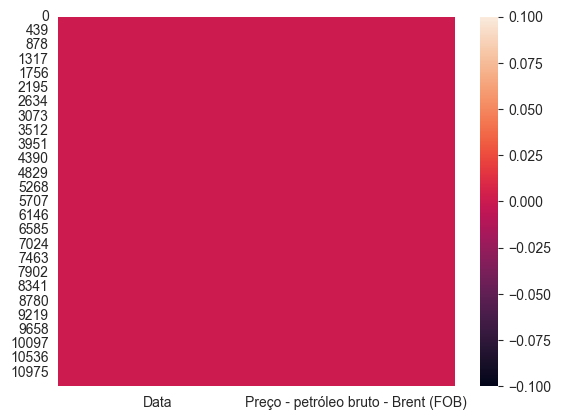

In [99]:
sns.heatmap(df_ipeadata.isnull())

In [100]:
df_ipeadata['Preço - petróleo bruto - Brent (FOB)'] = df_ipeadata['Preço - petróleo bruto - Brent (FOB)'].str.replace(',','.').astype(float)

In [101]:
df_ipeadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11403 entries, 0 to 11402
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Data                                  11403 non-null  object 
 1   Preço - petróleo bruto - Brent (FOB)  11403 non-null  float64
dtypes: float64(1), object(1)
memory usage: 178.3+ KB


<Axes: ylabel='Count'>

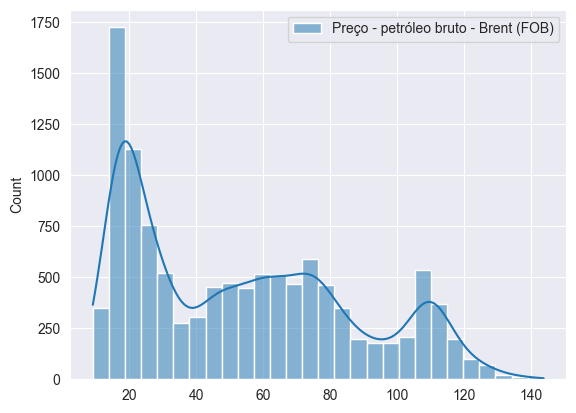

In [102]:
sns.histplot(df_ipeadata, kde=True)

<Axes: >

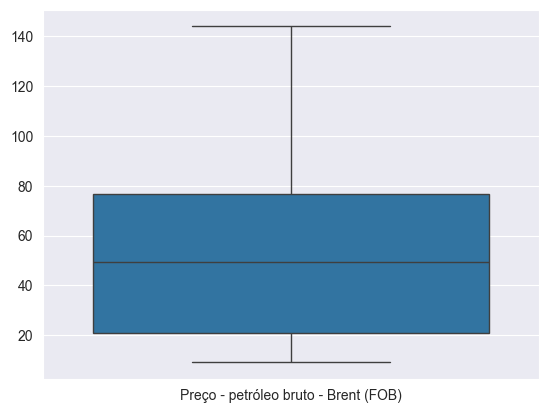

In [103]:
sns.boxplot(df_ipeadata)

<Axes: >

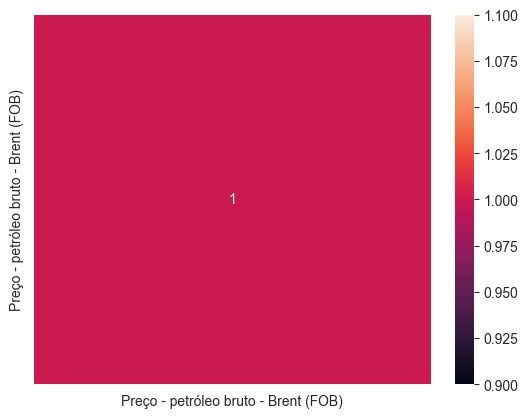

In [104]:
sns.heatmap(df_ipeadata.corr(numeric_only=True), annot=True)

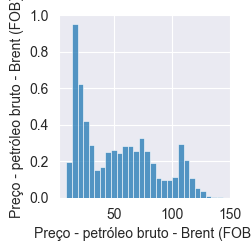

In [105]:
sns.pairplot(df_ipeadata)

In [106]:
df_ipeadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11403 entries, 0 to 11402
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Data                                  11403 non-null  object 
 1   Preço - petróleo bruto - Brent (FOB)  11403 non-null  float64
dtypes: float64(1), object(1)
memory usage: 178.3+ KB


In [107]:
df_ipeadata['Data']=pd.to_datetime(df_ipeadata['Data'], dayfirst=True)

In [108]:
df_ipeadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11403 entries, 0 to 11402
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Data                                  11403 non-null  datetime64[ns]
 1   Preço - petróleo bruto - Brent (FOB)  11403 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 178.3 KB


In [109]:
df_ipeadata.head()

,Data,Preço - petróleo bruto - Brent (FOB)
0,2025-04-14,67.18
1,2025-04-11,66.83
2,2025-04-10,65.37
3,2025-04-09,67.30
4,2025-04-08,64.86


In [110]:
df_ipeadata['Ano'] = df_ipeadata['Data'].dt.year
df_ipeadata['Mes'] = df_ipeadata['Data'].dt.month

In [111]:
df_ipeadata.head()

,Data,Preço - petróleo bruto - Brent (FOB),Ano,Mes
0,2025-04-14,67.18,2025,4
1,2025-04-11,66.83,2025,4
2,2025-04-10,65.37,2025,4
3,2025-04-09,67.30,2025,4
4,2025-04-08,64.86,2025,4


In [112]:
df_ipeadata.describe().round(2)

,Data,Preço - petróleo bruto - Brent (FOB),Ano,Mes
count,11403,11403.00,11403.00,11403.00
mean,2006-12-21 19:10:48.776637696,53.52,2006.47,6.53
min,1987-05-20 00:00:00,9.10,1987.00,1.00
25%,1998-08-10 12:00:00,20.73,1998.00,4.00
50%,2007-07-24 00:00:00,49.37,2007.00,7.00
75%,2015-06-14 12:00:00,76.78,2015.00,10.00
max,2025-04-14 00:00:00,143.95,2025.00,12.00
std,NaN,33.07,10.35,3.44


In [113]:
print(f'Os anos da Base: {df_ipeadata.Ano.unique()}')

Os anos da Base: [2025 2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014 2013 2012
 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002 2001 2000 1999 1998
 1997 1996 1995 1994 1993 1992 1991 1990 1989 1988 1987]


In [114]:
print(f'Os meses da Base: {df_ipeadata.Mes.unique()}')

Os meses da Base: [ 4  3  2  1 12 11 10  9  8  7  6  5]


In [115]:
df_ipeadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11403 entries, 0 to 11402
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Data                                  11403 non-null  datetime64[ns]
 1   Preço - petróleo bruto - Brent (FOB)  11403 non-null  float64       
 2   Ano                                   11403 non-null  int32         
 3   Mes                                   11403 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2)
memory usage: 267.4 KB


In [116]:
df_ipeadata.head()

,Data,Preço - petróleo bruto - Brent (FOB),Ano,Mes
0,2025-04-14,67.18,2025,4
1,2025-04-11,66.83,2025,4
2,2025-04-10,65.37,2025,4
3,2025-04-09,67.30,2025,4
4,2025-04-08,64.86,2025,4


In [117]:
print(type(df_ipeadata))

<class 'pandas.core.frame.DataFrame'>


In [118]:
ipeadata_prev = df_ipeadata.set_index('Data').sort_index()

In [119]:
ipeadata_prev = ipeadata_prev.asfreq('D', method='ffill')

In [120]:
# Preencher valores NaN nas outras colunas
for column in ipeadata_prev.columns:
    ipeadata_prev[column] = ipeadata_prev[column].fillna(method='ffill')

# Resetar o índice
ipeadata_prev.reset_index(inplace=True)

# Verificar o resultado
print(ipeadata_prev.head(10))

        Data  Preço - petróleo bruto - Brent (FOB)   Ano  Mes
0 1987-05-20                                 18.63  1987    5
1 1987-05-21                                 18.45  1987    5
2 1987-05-22                                 18.55  1987    5
3 1987-05-23                                 18.55  1987    5
4 1987-05-24                                 18.55  1987    5
5 1987-05-25                                 18.60  1987    5
6 1987-05-26                                 18.63  1987    5
7 1987-05-27                                 18.60  1987    5
8 1987-05-28                                 18.60  1987    5
9 1987-05-29                                 18.58  1987    5


C:\Users\kelvyn.candido\AppData\Local\Temp\ipykernel_8884\665000284.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ipeadata_prev[column] = ipeadata_prev[column].fillna(method='ffill')


In [121]:
ipeadata_prev.head()

,Data,Preço - petróleo bruto - Brent (FOB),Ano,Mes
0,1987-05-20,18.63,1987,5
1,1987-05-21,18.45,1987,5
2,1987-05-22,18.55,1987,5
3,1987-05-23,18.55,1987,5
4,1987-05-24,18.55,1987,5


In [122]:
ipeadata_prev.columns

Index(['Data', 'Preço - petróleo bruto - Brent (FOB)', 'Ano', 'Mes'], dtype='object')

In [123]:
ipeadata_prev = ipeadata_prev.drop(columns=['Ano', 'Mes']).rename(columns={'Preço - petróleo bruto - Brent (FOB)': 'preço'})

In [124]:
ipeadata_prev.head()

,Data,preço
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-23,18.55
4,1987-05-24,18.55


In [125]:
ipeadata_prev['unique_id'] = 'petroleo'

In [126]:
ipeadata_prev = ipeadata_prev.rename(columns={'Data': 'ds', 'preço': 'y'})

In [127]:
ipeadata_prev.tail()

,ds,y,unique_id
13840,2025-04-10,65.37,petroleo
13841,2025-04-11,66.83,petroleo
13842,2025-04-12,66.83,petroleo
13843,2025-04-13,66.83,petroleo
13844,2025-04-14,67.18,petroleo


In [128]:
df1 =  ipeadata_prev[['ds', 'y']]
df1 = ipeadata_prev.set_index('ds')

In [129]:
sns.set_style('darkgrid')

## Visualização Inicial
Utilizamos a biblioteca Matplotlib para plotar os dados do Ibovespa e analisar sua sazonalidade, o que nos permite compreender melhor o comportamento da bolsa durante esse período. Essa análise é essencial para uma interpretação mais aprofundada dos dados.

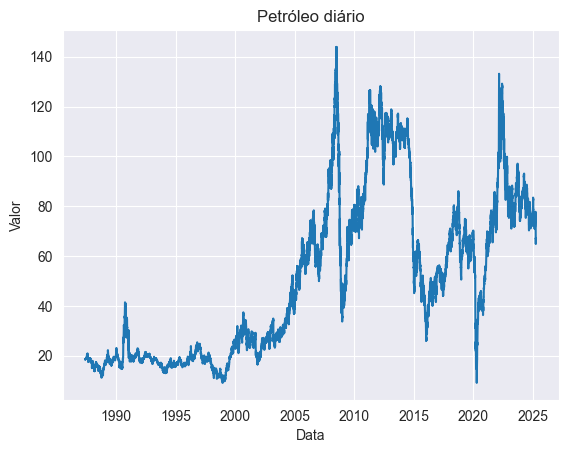

In [130]:
plt.plot(df1.index, df1["y"])
plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Petróleo diário')
plt.show()

Neste processo, utilizamos a função seasonal_decompose para decompor a série temporal em suas componentes: sazonalidade, tendência e ruído (ou residual), como mostrado na imagem abaixo:

In [131]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
resultados = seasonal_decompose(df1['y'], model='additive', period=365)

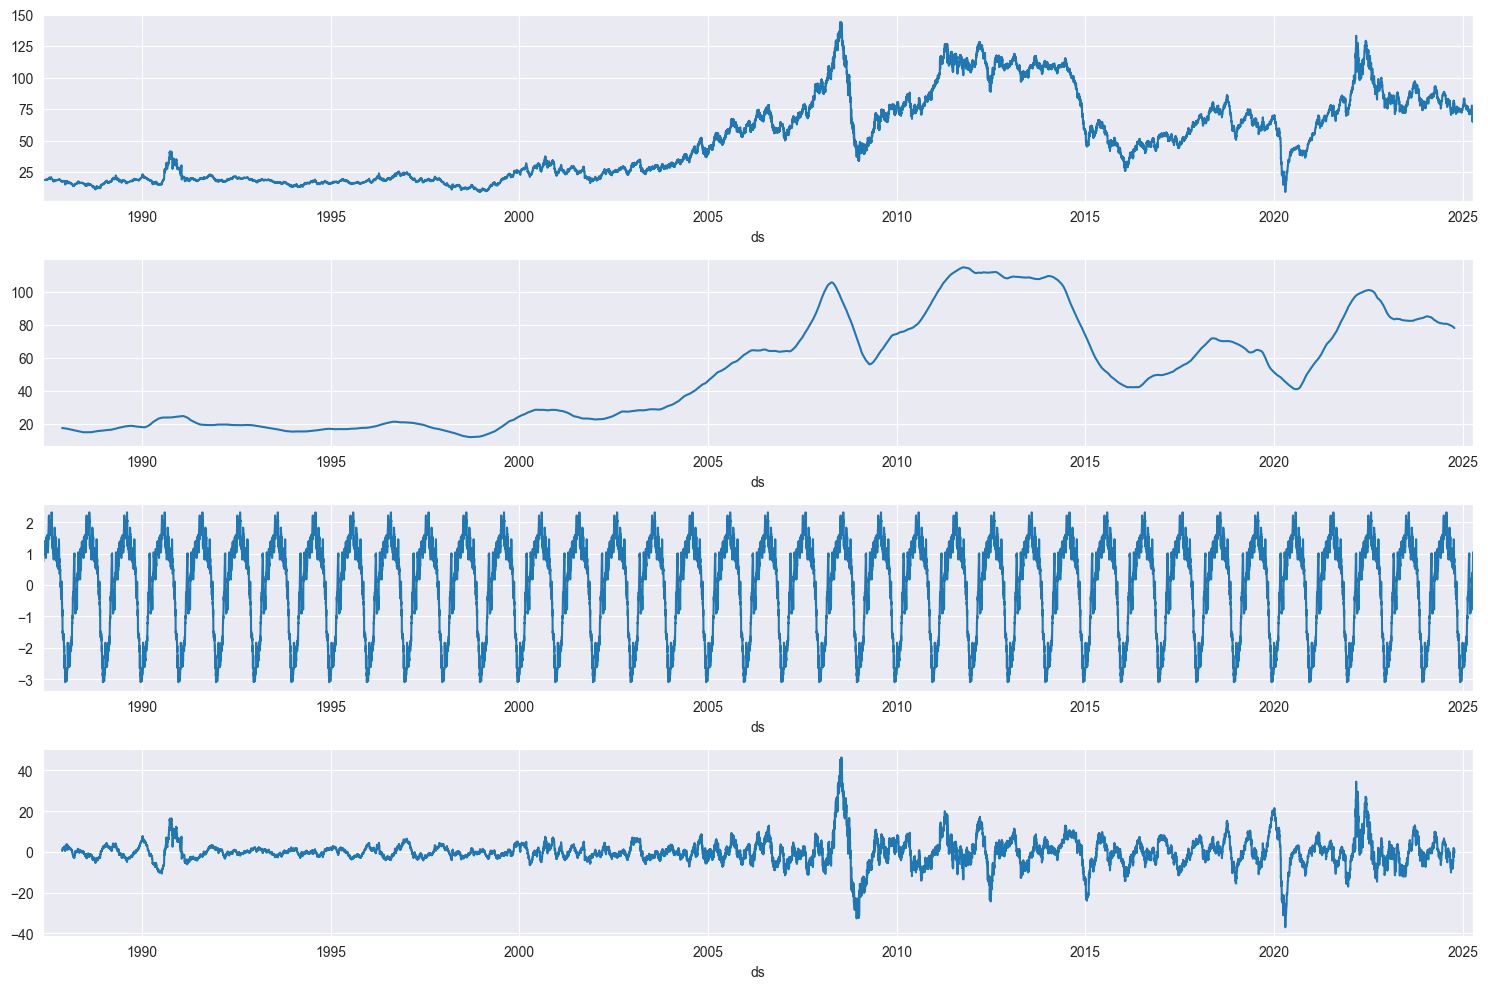

In [132]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize = (15,10))

# mostrando a série do data frame
resultados.observed.plot(ax=ax1)
# mostrando a tendência dos dados
resultados.trend.plot(ax=ax2)
# mostrando a sazonalidade - constante e recorrente
resultados.seasonal.plot(ax=ax3)
# mostrando os resíduos
resultados.resid.plot(ax=ax4)

plt.tight_layout()

In [133]:
from statsmodels.tsa.stattools import adfuller

In [134]:
X = df1.y.values

## Testes estatísticos
Aplicamos o teste de Dickey-Fuller Aumentado (ADF) com o objetivo de verificar sua estacionariedade. Uma série é considerada estacionária quando sua média e variância permanecem constantes ao longo do tempo. Caso contrário, a série é considerada não estacionária. Se o valor do teste estatístico for maior que os valores críticos e o p-value for alto (superior a 0,05), isso indica que não podemos rejeitar a hipótese nula de que a série é não estacionária

In [135]:
result = adfuller(X)

# como o teste estatístico é maior que os valores críticos e temos um p-value alto, descartamos a hipótese de série estacionária

print("Teste ADF")
print(f"Teste Estatístico: {result[0]}")
print(f"P-Value: {result[1]}")
print("Valores críticos:")

for key, value in result[4].items():
  print(f"\t{key}: {value}")

Teste ADF
Teste Estatístico: -2.247424608276195
P-Value: 0.1894852441650824
Valores críticos:
	1%: -3.4308238818010093
	5%: -2.861749433920977
	10%: -2.566881476852719


## Analise de tendência
Nesta análise, calculamos a média móvel utilizando uma janela de 365 dias para observar o comportamento dos dados ao longo do tempo. Através dessa média, podemos identificar uma tendência de crescimento nos dados.

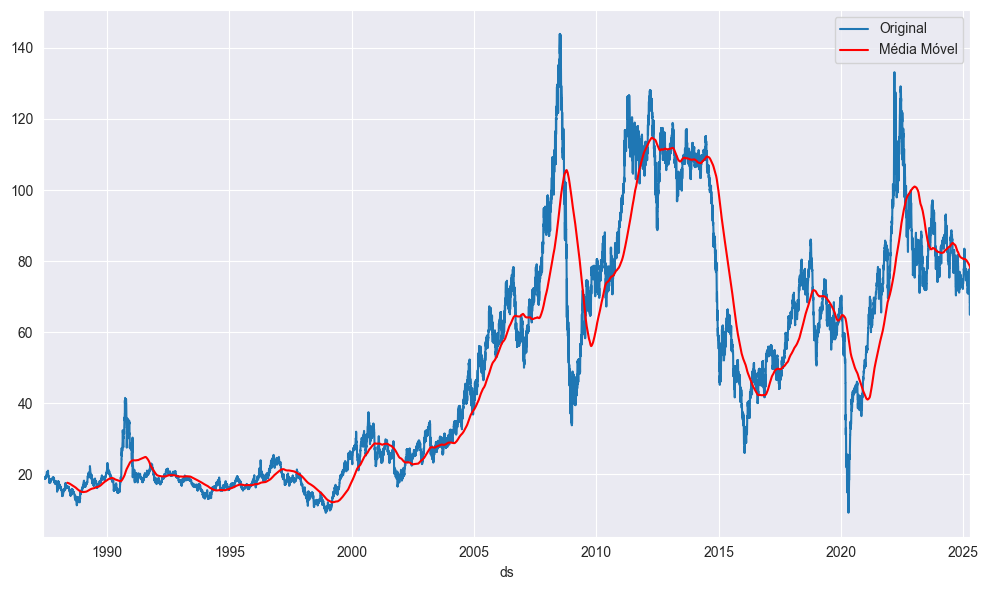

In [136]:
# Calcular média móvel com janela menor
ma = df1['y'].rolling(window=365).mean()

# Criar o gráfico
f, ax = plt.subplots(figsize=(10,6))
df1['y'].plot(ax=ax, label='Original')
ma.plot(ax=ax, color='r', label='Média Móvel')
plt.legend()
plt.tight_layout()

In [139]:
df1.head()

,y,unique_id
ds,,
1987-05-20,18.63,petroleo
1987-05-21,18.45,petroleo
1987-05-22,18.55,petroleo
1987-05-23,18.55,petroleo
1987-05-24,18.55,petroleo


Neste gráfico, visualizamos a evolução do preço do petróleo ao longo do tempo, com o objetivo de identificar os principais eventos que impactaram o mercado.

In [140]:
plt.figure(figsize=(12, 6))

# Definir as datas de corte
cut_dates = [
    datetime(1987, 5, 20),
    datetime(2000, 1, 1),
    datetime(2008, 1, 1),
    datetime(2013, 1, 1),
    datetime(2018, 1, 1),
    datetime(2021, 1, 1),
    datetime(2023, 12, 31),
    datetime(2025, 4, 10)
]

<Figure size 1200x600 with 0 Axes>

In [144]:
df1 = df1.reset_index().rename(columns={'index': 'ds'})

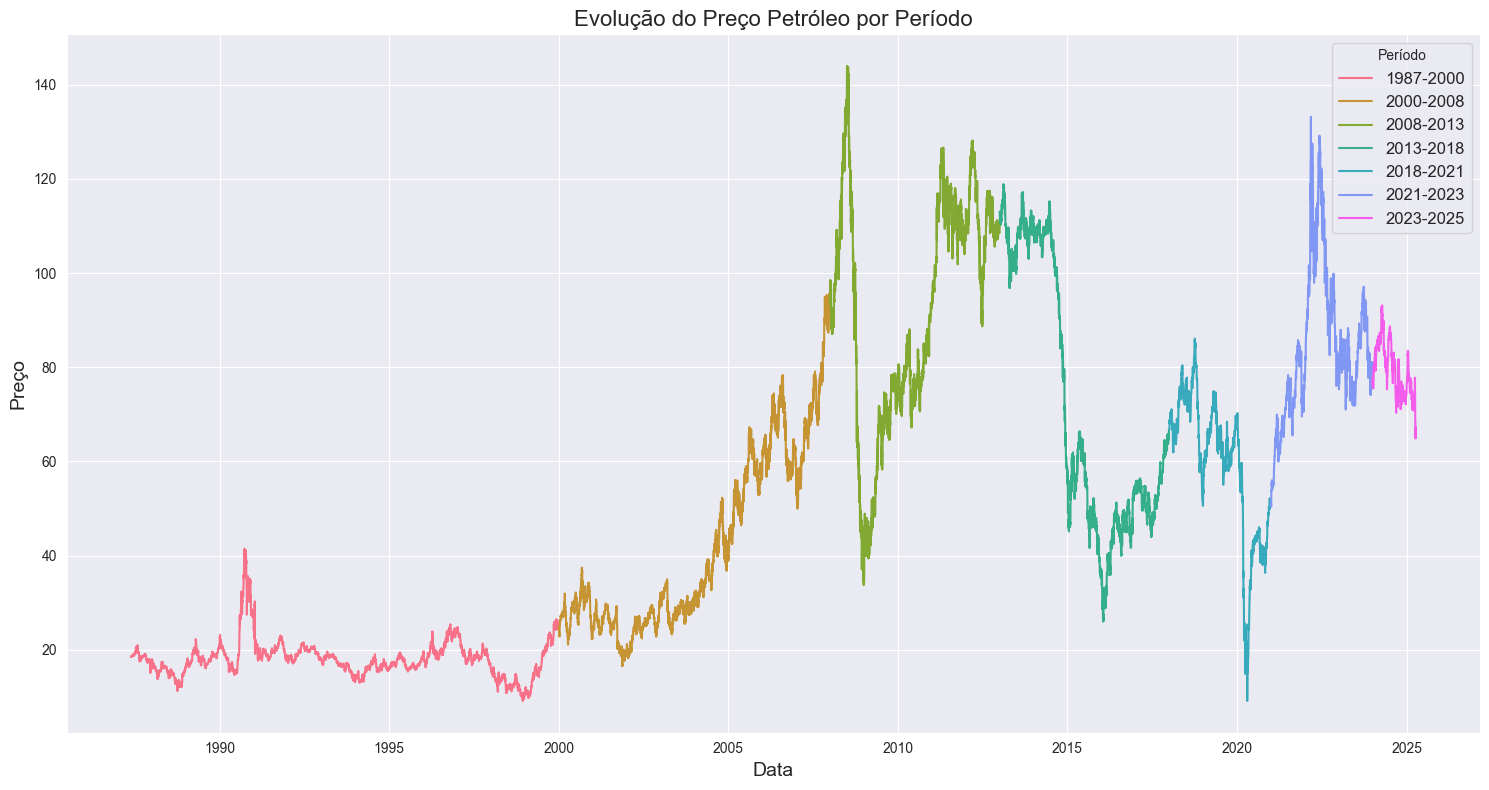

In [148]:
# Criar uma paleta de cores com o número correto de cores
colors = sns.color_palette("husl", len(cut_dates) - 1)  # "husl" gera uma paleta com várias cores distintas

# Aumentar o tamanho do plot
plt.figure(figsize=(15, 8))  # Ajuste o tamanho conforme necessário

# Plotar cada linha
for i in range(len(cut_dates) - 1):
    mask = (df1['ds'] > cut_dates[i]) & (df1['ds'] <= cut_dates[i+1])
    sns.lineplot(
        data=df1[mask],
        x='ds',
        y='y',
        color=colors[i],
        label=f'{cut_dates[i].year}-{cut_dates[i+1].year}'
    )

# Adicionar título e rótulos
plt.title("Evolução do Preço Petróleo por Período", fontsize=16)
plt.xlabel("Data", fontsize=14)
plt.ylabel("Preço", fontsize=14)
plt.legend(title="Período", fontsize=12)
plt.tight_layout()
plt.show()

## Preparação para Modelagem
O código abaixo pega um conjunto de dados e o divide em duas partes: uma para treinar um modelo de machine learning e outra para testar a performance desse modelo.

In [149]:
def split_train_test(df, start_date, test_ratio=0.2):
    # Filtra o DataFrame para incluir apenas dados a partir da data de início especificada
    df_period = df[df['ds'] >= start_date]

    # Calcula o índice de corte com base na proporção de teste
    cutoff_index = int(len(df_period) * (1 - test_ratio))

    # Cria o conjunto de treino com dados até o índice de corte (exclusive)
    df_train = df_period.iloc[:cutoff_index]

    # Cria o conjunto de teste com dados a partir do índice de corte
    df_test = df_period.iloc[cutoff_index:]

    # Retorna os conjuntos de treino e teste
    return df_train, df_test

A análise da evolução temporal dos dados é realizada através da segmentação da série histórica em múltiplos períodos, proporcionando uma visão detalhada do comportamento do Ibovespa ao longo do tempo. Esta abordagem permite a criação de visualizações específicas para cada intervalo, oferecendo insights valiosos sobre as tendências e padrões do mercado financeiro brasileiro.

Ao dividir os dados em conjuntos de treino e teste para diferentes períodos, obtemos uma perspectiva mais abrangente da capacidade de generalização dos modelos preditivos. Esta técnica é fundamental para avaliar a robustez e a consistência das previsões em diversos contextos temporais.

A comparação entre as linhas de treino e teste em cada visualização serve como um indicador crucial da eficácia do modelo. Uma correspondência próxima entre essas linhas sugere que o modelo mantém sua precisão preditiva mesmo quando aplicado a dados de períodos distintos daqueles utilizados em seu treinamento. Por outro lado, discrepâncias significativas podem indicar a necessidade de ajustes no modelo ou a presença de mudanças estruturais no comportamento do mercado ao longo do tempo.

Esta metodologia de análise não apenas contribui para a validação da performance do modelo, mas também oferece uma compreensão mais profunda das dinâmicas do Ibovespa em diferentes épocas. Tal entendimento é essencial para investidores e analistas de mercado, permitindo-lhes tomar decisões mais informadas e estratégicas.

In [150]:
start_dates = [
    pd.Timestamp('1987-05-20'),  # Desde o início da série histórica
    pd.Timestamp('2008-01-01'),  # Últimos 15 anos
    pd.Timestamp('2013-01-01'),  # Últimos 10 anos
    pd.Timestamp('2018-01-01'),  # Últimos 5 anos
    pd.Timestamp('2021-01-01'),  # Últimos 3 anos
    pd.Timestamp('2023-01-01'),  # Últimos 2 anos
    pd.Timestamp('2024-01-01')   # Último ano
]

A função split_train_test é projetada para dividir um conjunto de dados temporais de forma flexível e eficiente. Ela utiliza um parâmetro start_date, que permite ao usuário especificar dinamicamente o ponto de início para a análise. Esta abordagem oferece versatilidade na seleção do período de interesse.

A função opera da seguinte maneira:

Filtra o DataFrame para incluir apenas dados a partir da data de início fornecida. Calcula o ponto de divisão entre os conjuntos de treino e teste, baseado na proporção especificada (padrão de 20% para teste).

Separa os dados em conjuntos de treino e teste.

In [151]:
dfs = [split_train_test(df1, start_date) for start_date in start_dates]

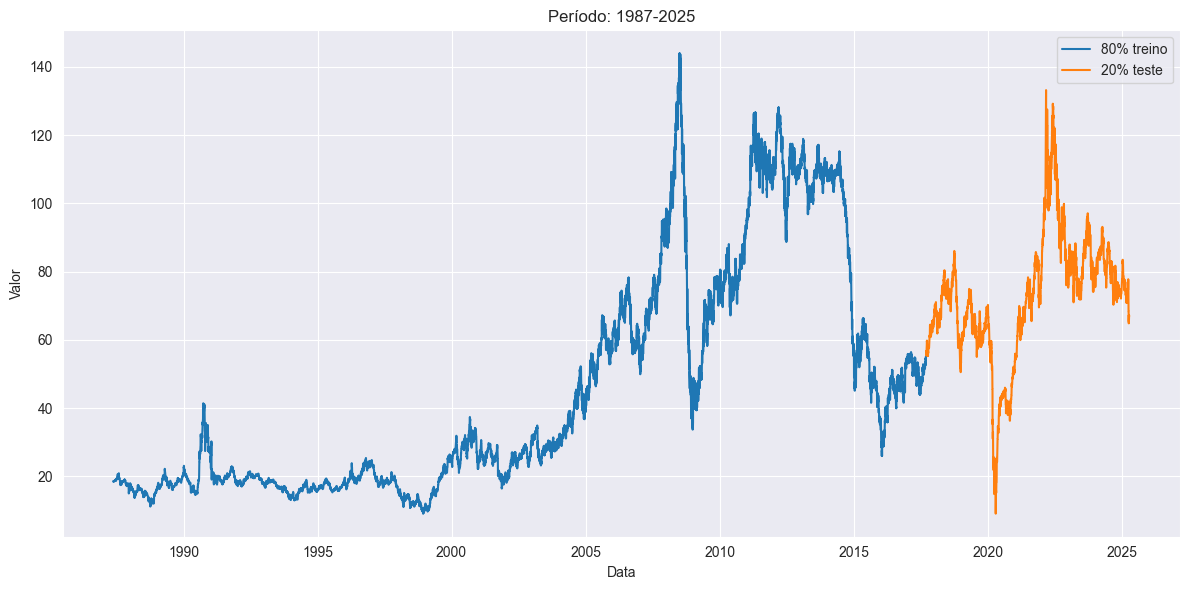

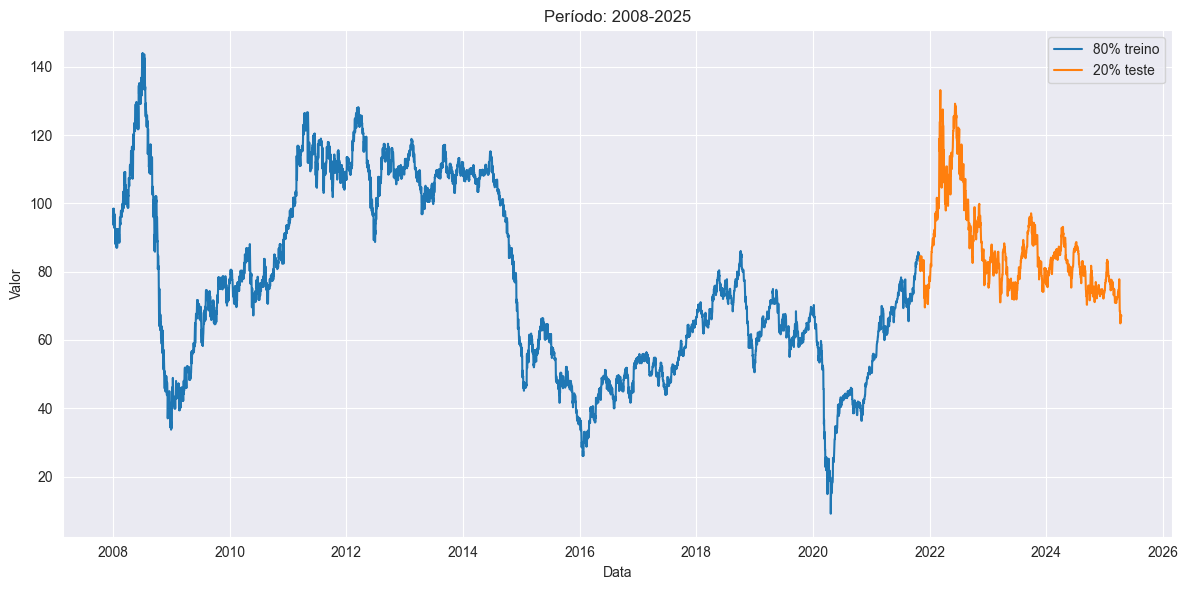

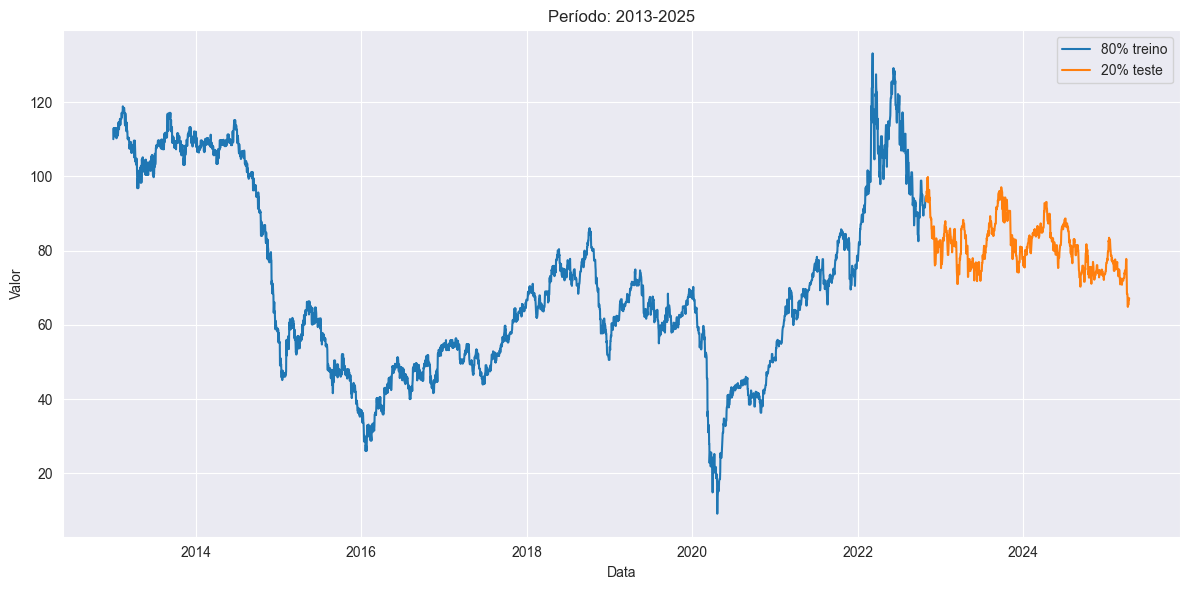

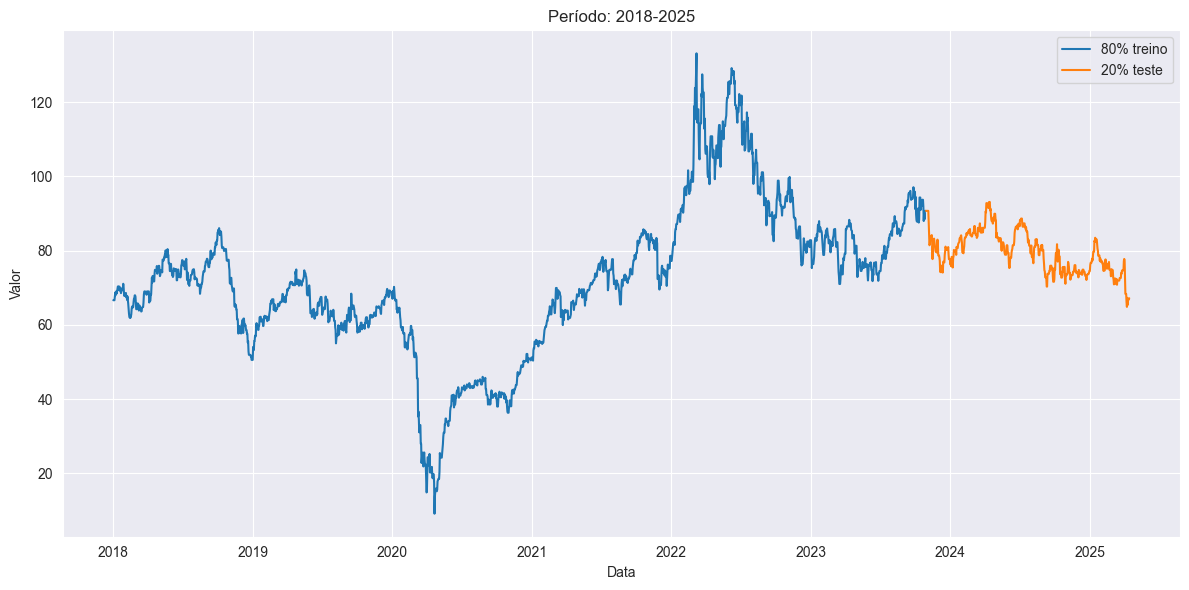

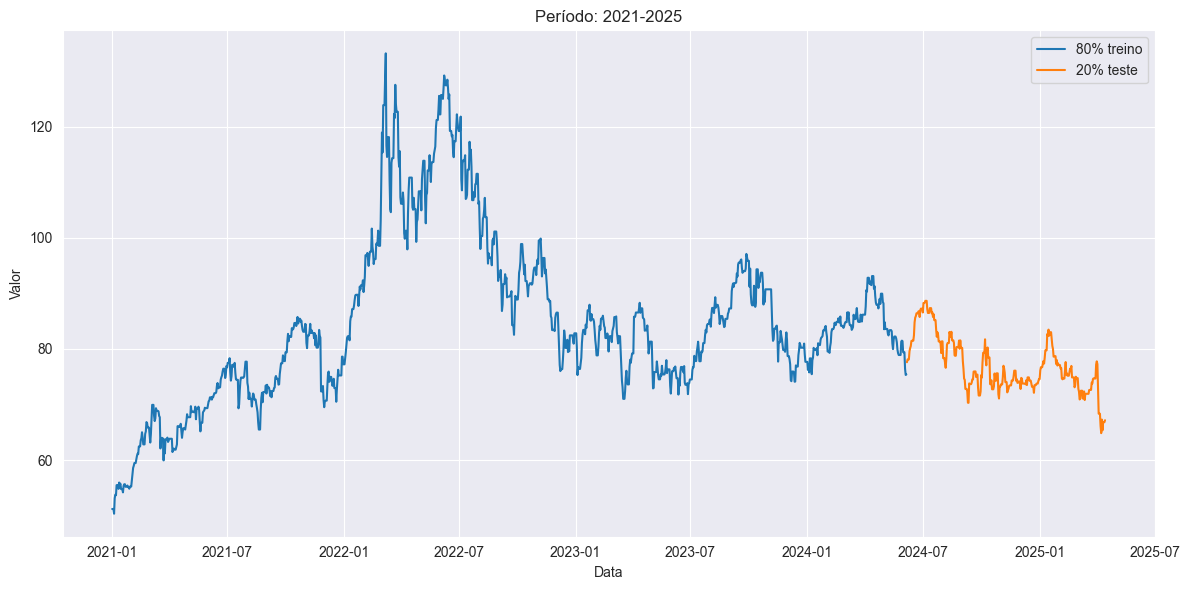

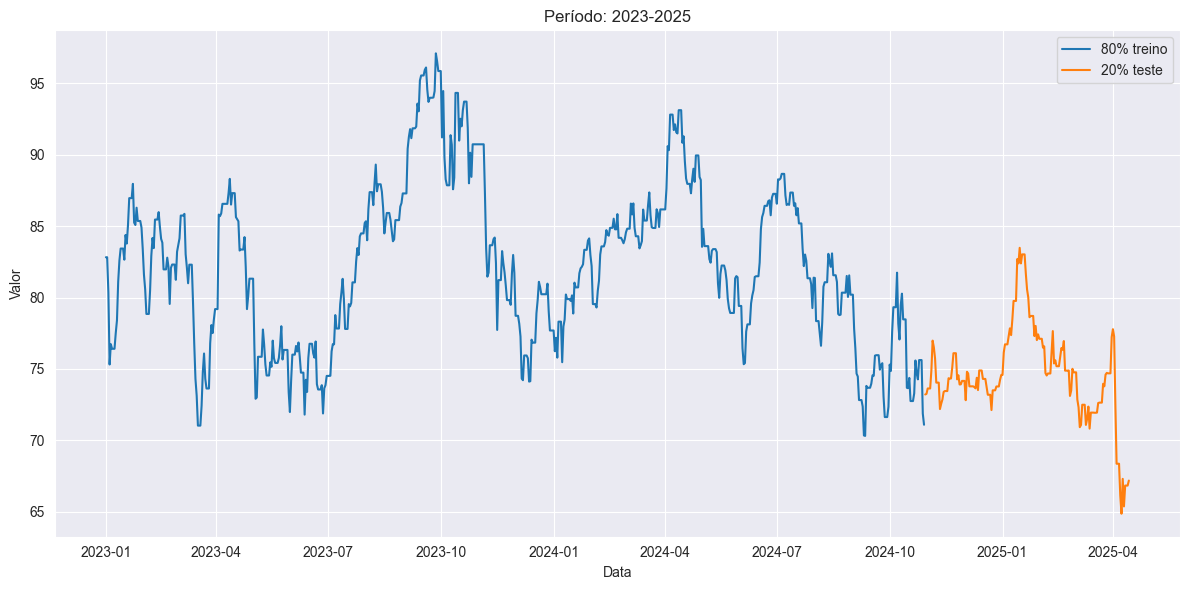

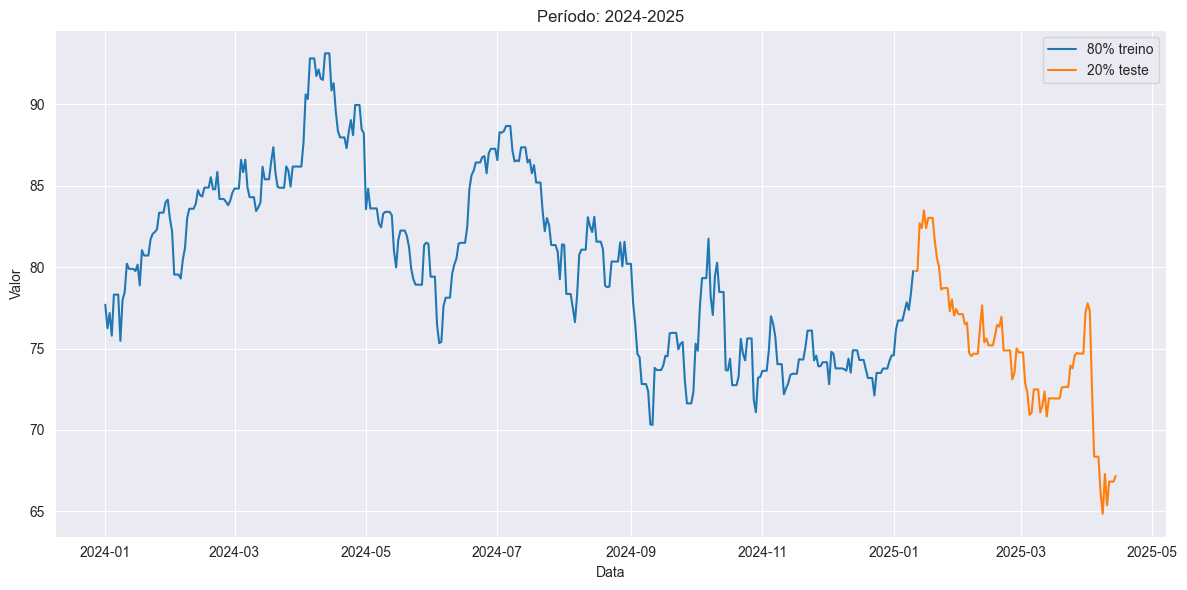

In [153]:
for i, (df_train, df_test) in enumerate(dfs):
    fig, ax = plt.subplots(figsize=(12, 6))
    
    sns.lineplot(data=df_train, x='ds', y='y', label='80% treino', ax=ax)
    sns.lineplot(data=df_test, x='ds', y='y', label='20% teste', ax=ax)
    
    ax.set_title(f'Período: {start_dates[i].year}-2025')
    ax.set_xlabel('Data')
    ax.set_ylabel('Valor')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [154]:
# Verificar o DataFrame df1
print("Informações do DataFrame:")
print(df1.info())
print("\nPrimeiras linhas do DataFrame:")
print(df1.head())

# Verificar a série da média móvel
print("\nInformações da média móvel:")
print(ma.head())
print("\nVerificar valores nulos na média móvel:")
print(ma.isnull().sum())

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13845 entries, 0 to 13844
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ds         13845 non-null  datetime64[ns]
 1   y          13845 non-null  float64       
 2   unique_id  13845 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 324.6+ KB
None

Primeiras linhas do DataFrame:
          ds      y unique_id
0 1987-05-20  18.63  petroleo
1 1987-05-21  18.45  petroleo
2 1987-05-22  18.55  petroleo
3 1987-05-23  18.55  petroleo
4 1987-05-24  18.55  petroleo

Informações da média móvel:
ds
1987-05-20   NaN
1987-05-21   NaN
1987-05-22   NaN
1987-05-23   NaN
1987-05-24   NaN
Name: y, dtype: float64

Verificar valores nulos na média móvel:
364


## Transformações Adicionais
O código executa uma análise preliminar eficiente de uma série temporal, focando em duas transformações principais:

Conversão logarítmica: Aplica o logaritmo natural aos valores da série, o que ajuda a estabilizar a variância e linearizar tendências exponenciais.

Cálculo da média móvel: Utiliza uma janela de 365 dias para suavizar flutuações de curto prazo e revelar tendências de longo prazo. Estas transformações são cruciais para:

Identificar padrões subjacentes na série temporal
Avaliar a estacionariedade dos dados
Guiar a seleção de modelos preditivos apropriados
A visualização gráfica resultante permite uma comparação direta entre a série logarítmica e sua média móvel, facilitando a detecção de tendências, sazonalidades e possíveis anomalias

In [155]:
print(df1.dtypes)

ds           datetime64[ns]
y                   float64
unique_id            object
dtype: object


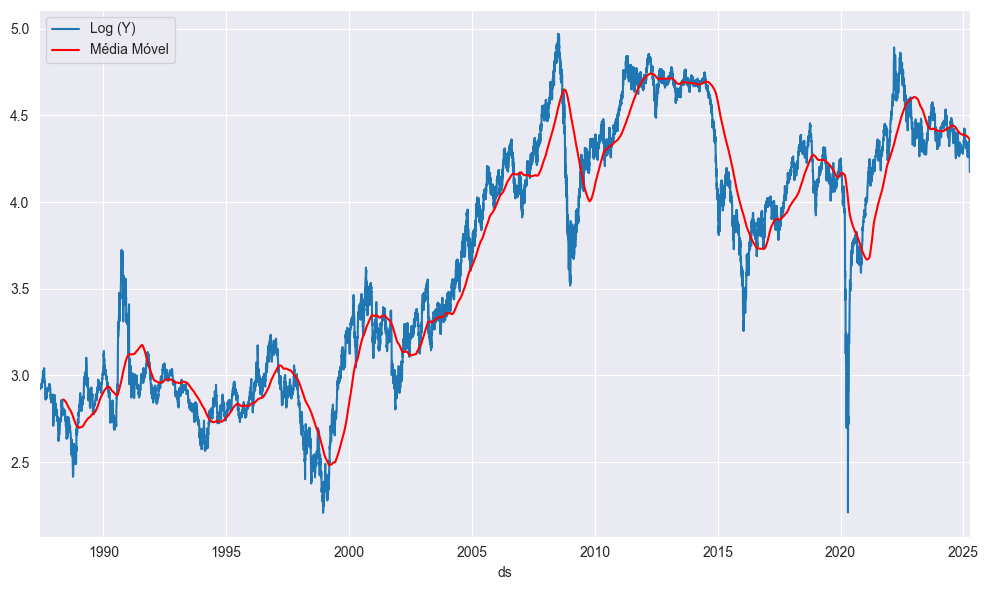

In [156]:
#selecionando somente as colunas ds e y, pois não são objetos
df_select = df1[['ds', 'y']]
# aplica a função logaritmo na coluna y
df_select['y_log'] = np.log(df_select['y'])
#calcular a media móvel
df_select['ma_log'] = df_select['y_log'].rolling(window=365).mean()
# Plotar o gráfico
f, ax = plt.subplots(figsize=(10,6))
# série logarítmica
df_select.plot(x ='ds', y='y_log',ax=ax, legend=False, label='Log (Y)')
df_select.plot(x='ds', y='ma_log', ax=ax, color='r', legend=False, label='Média Móvel')  # Média móvel
# Ajustar layout e adicionar legenda
plt.legend()
plt.tight_layout()
plt.show()

O código abaixo executa o teste de raiz unitária de Augmented Dickey-Fuller (ADF) para avaliar a estacionariedade da série temporal.

In [157]:
serie_teste = df_select['y_log'].dropna()
resultado = adfuller(serie_teste)

# como o teste estatístico é maior que os valores críticos e temos um p-value alto, descartamos a hipótese de série estacionária

print("Teste ADF")
print(f"Teste Estatístico: {resultado[0]}")
print(f"P-Value: {resultado[1]}")
print("Valores críticos:")

for key, value in resultado[4].items():
  print(f"\t{key}: {value}")

Teste ADF
Teste Estatístico: -1.9929485361917627
P-Value: 0.2896734536335354
Valores críticos:
	1%: -3.4308238818010093
	5%: -2.861749433920977
	10%: -2.566881476852719


## A interpretação dos resultados acima revela:
O teste estatístico (-1.9929) é maior que todos os valores críticos, indicando que não há evidência suficiente para rejeitar a hipótese nula de não-estacionariedade.

O p-value (0.2896) é consideravelmente maior que o nível de significância padrão de 0.05, corroborando a conclusão de não rejeitar a hipótese nula.

Estas evidências sugerem fortemente que a série temporal em questão não é estacionária. A não-estacionariedade implica que as propriedades estatísticas da série, como média e variância, não são constantes ao longo do tempo.

In [158]:
print(df_select.dtypes)
print(df_select.head(5))

ds        datetime64[ns]
y                float64
y_log            float64
ma_log           float64
dtype: object
          ds      y     y_log  ma_log
0 1987-05-20  18.63  2.924773     NaN
1 1987-05-21  18.45  2.915064     NaN
2 1987-05-22  18.55  2.920470     NaN
3 1987-05-23  18.55  2.920470     NaN
4 1987-05-24  18.55  2.920470     NaN


Conclusão Os resultados indicam que a série não é estacionária. Isso significa que o modelo ARIMA, ou outro baseado em séries temporais, terá dificuldades em capturar padrões adequados sem primeiro tornar a série estacionária.

### Transformando a série em estácionária.


In [159]:
# Aplicar diferenciação na série log-transformada
df_select['y_log_diff'] = df_select['y_log'].diff().dropna()

# Repetir o teste ADF para a série diferenciada
serie_teste_diff = df_select['y_log_diff'].dropna()
resultado_diff = adfuller(serie_teste_diff)

print("Teste ADF para Série Diferenciada:")
print(f"Estatística ADF: {resultado_diff[0]}")
print(f"P-Valor: {resultado_diff[1]}")
print("Valores Críticos:")
for key, value in resultado_diff[4].items():
    print(f"  {key}: {value}")

Teste ADF para Série Diferenciada:
Estatística ADF: -16.789573386899782
P-Valor: 1.2451736328849206e-29
Valores Críticos:
  1%: -3.4308238818010093
  5%: -2.861749433920977
  10%: -2.566881476852719


O gráfico apresentado ilustra uma série temporal que passou por duas transformações sequenciais: logarítmica e diferenciação. Estas operações são fundamentais na análise de séries temporais financeiras, como o Ibovespa, por várias razões:

Transformação logarítmica:
Estabiliza a variância da série, reduzindo a heteroscedasticidade
Lineariza tendências exponenciais, facilitando a análise
Torna as mudanças percentuais mais evidentes
Diferenciação:
Remove tendências lineares, tornando a série mais estacionária
Elimina a dependência temporal, crucial para muitos modelos estatísticos
Destaca mudanças de curto prazo na série
O resultado destas transformações é uma série que tende a oscilar em torno de zero, com amplitude relativamente constante. Esta característica é indicativa de estacionariedade, uma propriedade desejável que implica:

Média constante ao longo do tempo
Variância constante ao longo do tempo
Autocorrelação independente do tempo
A estacionariedade é essencial para a aplicação de muitos modelos de séries temporais, como o ARIMA, pois permite previsões mais confiáveis e interpretáveis. Além disso, facilita a identificação de padrões cíclicos ou sazonais que podem estar ocultos na série original.

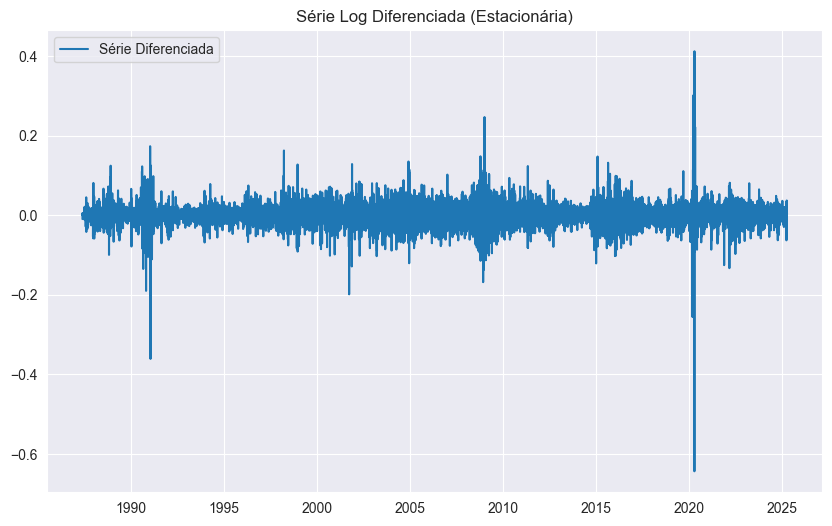

In [160]:
# Visualização da série diferenciada
plt.figure(figsize=(10, 6))
plt.plot(df_select['ds'], df_select['y_log_diff'], label='Série Diferenciada')
plt.title('Série Log Diferenciada (Estacionária)')
plt.legend()
plt.show()